# POMS Automatic Scoring

In [1]:
import os
import pandas as pd
from src.my_settings import settings
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

sett = settings()

In [2]:
tsv_path = os.path.join(sett['git_path'], 'data', 'POMS_Responses.tsv')

df = pd.read_csv(tsv_path, sep='\t')

# subtract 1 from all values from the third column to the last
df.iloc[:, 2:] = df.iloc[:, 2:] - 1

df

,Sujeito,Tempo,Tenso,Irritado,Imprestável,Esgotado,Animado,Confuso,Triste,Activo,Mal-humorado,Enérgico,Sem valor,Inquieto,Fatigado,Aborrecido,Desencorajado,Nervoso,Só,Baralhado,Exausto,Ansioso,Deprimido,Sem energia,Miserável,Desnorteado,Furioso,Eficaz,Cheio de vida,Com mau feitio,Tranquilo,Desanimado,Impaciente,Cheio de boa disposição,Inútil,Estourado,Competente,Culpado,Enervado,Infeliz,Alegre,Inseguro,Cansado,Apático
0,1,Antes,2,1,0,1,3,0,0,1,0,3,0,1,2,1.0,0,1.0,0,0.0,1,1.0,0,1,0,0,0.0,2,2,0,2,0,0,3,1,1,2,0,1,0,3,0,2,0
1,1,Depois,0,0,0,2,3,0,0,3,0,3,0,1,2,1.0,0,0.0,0,1.0,2,0.0,0,2,0,0,0.0,3,2,0,3,1,1,3,0,1,3,0,1,0,3,0,3,0
2,2,Antes,0,0,0,0,2,0,0,2,0,2,0,0,1,2.0,0,0.0,0,0.0,0,1.0,0,0,0,0,0.0,2,1,0,4,0,0,2,0,0,2,0,0,0,3,0,0,0
3,2,Depois,0,0,0,1,3,0,0,3,0,2,0,0,0,0.0,0,0.0,0,0.0,2,0.0,0,2,0,0,0.0,3,3,0,4,0,0,3,0,0,3,0,0,0,3,0,2,0
4,3,Antes,0,0,1,1,3,0,0,3,1,2,0,1,2,0.0,0,1.0,0,1.0,1,1.0,0,1,0,0,0.0,3,2,1,3,1,2,2,1,2,3,0,0,0,3,2,2,0
5,3,Depois,0,0,0,0,3,0,0,3,0,3,0,0,2,0.0,0,0.0,0,1.0,1,0.0,0,1,0,1,0.0,3,2,1,4,0,0,3,0,2,2,0,0,0,3,1,2,0
6,4,Antes,0,0,0,0,3,0,0,4,0,3,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,3,3,0,4,0,0,3,0,0,3,0,0,0,3,0,0,0
7,5,Antes,1,0,0,0,2,0,1,2,0,2,0,0,2,1.0,0,0.0,0,0.0,1,1.0,0,1,0,0,0.0,2,2,0,2,1,0,1,0,0,3,0,0,0,1,0,2,1
8,4,Depois,0,0,0,1,3,0,0,3,0,3,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,3,3,0,4,0,0,3,0,0,3,0,0,0,3,0,0,0
9,5,Depois,0,0,0,0,2,0,0,1,0,1,0,0,1,1.0,0,0.0,0,0.0,1,0.0,0,1,0,0,0.0,3,1,0,2,0,1,2,0,0,3,0,0,0,1,0,1,1


## Scoring

In [3]:
# Invert the scores of Eficaz, Tranquilo, Competente
df['Eficaz'] = 4 - df['Eficaz']
df['Tranquilo'] = 4 - df['Tranquilo']
df['Competente'] = 4 - df['Competente']

df

,Sujeito,Tempo,Tenso,Irritado,Imprestável,Esgotado,Animado,Confuso,Triste,Activo,Mal-humorado,Enérgico,Sem valor,Inquieto,Fatigado,Aborrecido,Desencorajado,Nervoso,Só,Baralhado,Exausto,Ansioso,Deprimido,Sem energia,Miserável,Desnorteado,Furioso,Eficaz,Cheio de vida,Com mau feitio,Tranquilo,Desanimado,Impaciente,Cheio de boa disposição,Inútil,Estourado,Competente,Culpado,Enervado,Infeliz,Alegre,Inseguro,Cansado,Apático
0,1,Antes,2,1,0,1,3,0,0,1,0,3,0,1,2,1.0,0,1.0,0,0.0,1,1.0,0,1,0,0,0.0,2,2,0,2,0,0,3,1,1,2,0,1,0,3,0,2,0
1,1,Depois,0,0,0,2,3,0,0,3,0,3,0,1,2,1.0,0,0.0,0,1.0,2,0.0,0,2,0,0,0.0,1,2,0,1,1,1,3,0,1,1,0,1,0,3,0,3,0
2,2,Antes,0,0,0,0,2,0,0,2,0,2,0,0,1,2.0,0,0.0,0,0.0,0,1.0,0,0,0,0,0.0,2,1,0,0,0,0,2,0,0,2,0,0,0,3,0,0,0
3,2,Depois,0,0,0,1,3,0,0,3,0,2,0,0,0,0.0,0,0.0,0,0.0,2,0.0,0,2,0,0,0.0,1,3,0,0,0,0,3,0,0,1,0,0,0,3,0,2,0
4,3,Antes,0,0,1,1,3,0,0,3,1,2,0,1,2,0.0,0,1.0,0,1.0,1,1.0,0,1,0,0,0.0,1,2,1,1,1,2,2,1,2,1,0,0,0,3,2,2,0
5,3,Depois,0,0,0,0,3,0,0,3,0,3,0,0,2,0.0,0,0.0,0,1.0,1,0.0,0,1,0,1,0.0,1,2,1,0,0,0,3,0,2,2,0,0,0,3,1,2,0
6,4,Antes,0,0,0,0,3,0,0,4,0,3,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,1,3,0,0,0,0,3,0,0,1,0,0,0,3,0,0,0
7,5,Antes,1,0,0,0,2,0,1,2,0,2,0,0,2,1.0,0,0.0,0,0.0,1,1.0,0,1,0,0,0.0,2,2,0,2,1,0,1,0,0,1,0,0,0,1,0,2,1
8,4,Depois,0,0,0,1,3,0,0,3,0,3,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,1,3,0,0,0,0,3,0,0,1,0,0,0,3,0,0,0
9,5,Depois,0,0,0,0,2,0,0,1,0,1,0,0,1,1.0,0,0.0,0,0.0,1,0.0,0,1,0,0,0.0,1,1,0,2,0,1,2,0,0,1,0,0,0,1,0,1,1


In [4]:
# list all columns
df.columns

Index(['Sujeito', 'Tempo', 'Tenso', 'Irritado', 'Imprestável', 'Esgotado',
       'Animado', 'Confuso', 'Triste', 'Activo', 'Mal-humorado', 'Enérgico',
       'Sem valor', 'Inquieto', 'Fatigado', 'Aborrecido', 'Desencorajado',
       'Nervoso', 'Só', 'Baralhado', 'Exausto', 'Ansioso', 'Deprimido',
       'Sem energia', 'Miserável', 'Desnorteado', 'Furioso', 'Eficaz',
       'Cheio de vida', 'Com mau feitio', 'Tranquilo', 'Desanimado',
       'Impaciente', 'Cheio de boa disposição', 'Inútil', 'Estourado',
       'Competente', 'Culpado', 'Enervado', 'Infeliz', 'Alegre', 'Inseguro',
       'Cansado', 'Apático'],
      dtype='object')

In [5]:
# replace missing data with 2 (median value)
df = df.fillna(2)

In [6]:
# estimate Tensão, Depressão, Hostilidade, Vigor, Fadiga, Confusão

df['S_Tension'] = df['Tenso'] + df['Nervoso'] + df['Impaciente'] + df['Inquieto'] + df['Ansioso']
df['S_Depression'] = df['Triste'] + df['Desencorajado'] + df['Só'] + df['Deprimido'] + df['Desanimado'] + df['Infeliz']
df['S_Hostility'] = df['Irritado'] + df['Mal-humorado'] + df['Aborrecido'] + df['Furioso'] + df['Com mau feitio'] + df['Enervado']
df['S_Fatigue'] = df['Esgotado'] + df['Fatigado'] + df['Exausto'] + df['Sem energia'] + df['Cansado'] + df['Estourado']
df['S_Vigor'] = df['Animado'] + df['Activo'] + df['Enérgico'] + df['Alegre'] + df['Cheio de boa disposição']
df['S_Confusion'] = df['Confuso'] + df['Baralhado'] + df['Desnorteado'] + df['Inseguro'] + df['Competente'] + df['Eficaz']

df['S_Total'] = df['S_Tension'] + df['S_Depression'] + df['S_Hostility'] + df['S_Fatigue'] + df['S_Confusion'] - df['S_Vigor'] + 100
df

,Sujeito,Tempo,Tenso,Irritado,Imprestável,Esgotado,Animado,Confuso,Triste,Activo,Mal-humorado,Enérgico,Sem valor,Inquieto,Fatigado,Aborrecido,Desencorajado,Nervoso,Só,Baralhado,Exausto,Ansioso,Deprimido,Sem energia,Miserável,Desnorteado,Furioso,Eficaz,Cheio de vida,Com mau feitio,Tranquilo,Desanimado,Impaciente,Cheio de boa disposição,Inútil,Estourado,Competente,Culpado,Enervado,Infeliz,Alegre,Inseguro,Cansado,Apático,S_Tension,S_Depression,S_Hostility,S_Fatigue,S_Vigor,S_Confusion,S_Total
0,1,Antes,2,1,0,1,3,0,0,1,0,3,0,1,2,1.0,0,1.0,0,0.0,1,1.0,0,1,0,0,0.0,2,2,0,2,0,0,3,1,1,2,0,1,0,3,0,2,0,5.0,0,3.0,8,13,4.0,107.0
1,1,Depois,0,0,0,2,3,0,0,3,0,3,0,1,2,1.0,0,0.0,0,1.0,2,0.0,0,2,0,0,0.0,1,2,0,1,1,1,3,0,1,1,0,1,0,3,0,3,0,2.0,1,2.0,12,15,3.0,105.0
2,2,Antes,0,0,0,0,2,0,0,2,0,2,0,0,1,2.0,0,0.0,0,0.0,0,1.0,0,0,0,0,0.0,2,1,0,0,0,0,2,0,0,2,0,0,0,3,0,0,0,1.0,0,2.0,1,11,4.0,97.0
3,2,Depois,0,0,0,1,3,0,0,3,0,2,0,0,0,0.0,0,0.0,0,0.0,2,0.0,0,2,0,0,0.0,1,3,0,0,0,0,3,0,0,1,0,0,0,3,0,2,0,0.0,0,0.0,7,14,2.0,95.0
4,3,Antes,0,0,1,1,3,0,0,3,1,2,0,1,2,0.0,0,1.0,0,1.0,1,1.0,0,1,0,0,0.0,1,2,1,1,1,2,2,1,2,1,0,0,0,3,2,2,0,5.0,1,2.0,9,13,5.0,109.0
5,3,Depois,0,0,0,0,3,0,0,3,0,3,0,0,2,0.0,0,0.0,0,1.0,1,0.0,0,1,0,1,0.0,1,2,1,0,0,0,3,0,2,2,0,0,0,3,1,2,0,0.0,0,1.0,8,15,6.0,100.0
6,4,Antes,0,0,0,0,3,0,0,4,0,3,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,1,3,0,0,0,0,3,0,0,1,0,0,0,3,0,0,0,0.0,0,0.0,0,16,2.0,86.0
7,5,Antes,1,0,0,0,2,0,1,2,0,2,0,0,2,1.0,0,0.0,0,0.0,1,1.0,0,1,0,0,0.0,2,2,0,2,1,0,1,0,0,1,0,0,0,1,0,2,1,2.0,2,1.0,6,8,3.0,106.0
8,4,Depois,0,0,0,1,3,0,0,3,0,3,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,1,3,0,0,0,0,3,0,0,1,0,0,0,3,0,0,0,0.0,0,0.0,1,15,2.0,88.0
9,5,Depois,0,0,0,0,2,0,0,1,0,1,0,0,1,1.0,0,0.0,0,0.0,1,0.0,0,1,0,0,0.0,1,1,0,2,0,1,2,0,0,1,0,0,0,1,0,1,1,1.0,0,1.0,4,7,2.0,101.0


## Descriptive Statistics

In [7]:
# describe the new columns (df['S_Tension'], df['S_Depression'], df['S_Hostility'],df['S_Fatigue'], df['S_Confusion'], df['S_Vigor'], df['S_Total']) grouped by Tempo (Antes vs. Depois)
df.groupby('Tempo')[['S_Tension', 'S_Depression', 'S_Hostility', 'S_Fatigue', 'S_Confusion', 'S_Vigor', 'S_Total']].describe()


S_Tension                                               S_Depression  \
           count      mean       std  min  25%  50%  75%   max        count   
Tempo                                                                         
Antes       21.0  4.047619  3.584358  0.0  1.0  4.0  6.0  12.0         21.0   
Depois      19.0  1.105263  1.486784  0.0  0.0  0.0  2.0   5.0         19.0   

                                                     S_Hostility            \
            mean       std  min  25%  50%  75%   max       count      mean   
Tempo                                                                        
Antes   1.190476  2.315579  0.0  0.0  0.0  1.0  10.0        21.0  2.000000   
Depois  0.263158  0.733493  0.0  0.0  0.0  0.0   3.0        19.0  0.736842   

                                          S_Fatigue                           \
             std  min  25%  50%  75%  max     count      mean       std  min   
Tempo                                                                          
Antes   2.144761  0.0  0.0  1.0  3.0  8.0      21.0  6.000000  4.393177  0.0   
Depois  1.194529  0.0  0.0  0.0  1.0  4.0      19.0  5.421053  4.549918  0.0   

                            S_Confusion                                     \
        25%  50%  75%   max       count      mean       std  min  25%  50%   
Tempo                                                                        
Antes   3.0  5.0  8.0  19.0        21.0  4.523810  3.059723  0.0  3.0  4.0   
Depois  2.0  4.0  7.5  18.0        19.0  3.526316  2.117872  0.0  2.0  3.0   

                  S_Vigor                                                    \
        75%   max   count       mean       std  min   25%   50%   75%   max   
Tempo                                                                         
Antes   5.0  14.0    21.0  12.047619  2.355338  7.0  11.0  13.0  14.0  16.0   
Depois  5.0   8.0    19.0  12.473684  3.672245  3.0  12.0  13.0  15.0  16.0   

       S_Total                                                          
         count        mean        std   min   25%    50%    75%    max  
Tempo                                                                   
Antes     21.0  105.714286  12.466527  86.0  97.0  106.0  109.0  140.0  
Depois    19.0   98.578947   8.050644  87.0  92.5   98.0  105.0  112.0

## Statistical testing between the two time points - Antes vs. Depois

In [8]:
# compare the df['S_Total] scores between the two groups indicated by the column 'Tempo'
# let's use Mann-Whitney U test

from scipy.stats import mannwhitneyu

group1 = df[df['Tempo'] == 'Antes']
group2 = df[df['Tempo'] == 'Depois']

new_column_name_list = ['S_Tension', 'S_Depression', 'S_Hostility', 'S_Fatigue', 'S_Confusion', 'S_Vigor', 'S_Total']

for column_name in new_column_name_list:
    print(column_name)
    print(mannwhitneyu(group1[column_name], group2[column_name]))


S_Tension
MannwhitneyuResult(statistic=np.float64(303.5), pvalue=np.float64(0.004005628517647234))
S_Depression
MannwhitneyuResult(statistic=np.float64(256.5), pvalue=np.float64(0.05841385087877337))
S_Hostility
MannwhitneyuResult(statistic=np.float64(279.0), pvalue=np.float64(0.023955393810706386))
S_Fatigue
MannwhitneyuResult(statistic=np.float64(220.5), pvalue=np.float64(0.5771672164813275))
S_Confusion
MannwhitneyuResult(statistic=np.float64(240.0), pvalue=np.float64(0.26975385098366667))
S_Vigor
MannwhitneyuResult(statistic=np.float64(157.5), pvalue=np.float64(0.25671427497845944))
S_Total
MannwhitneyuResult(statistic=np.float64(269.0), pvalue=np.float64(0.06131005375961148))


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Antes vs. Depois: Mann-Whitney-Wilcoxon test two-sided, P_val:4.006e-03 U_stat=3.035e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Antes vs. Depois: Mann-Whitney-Wilcoxon test two-sided, P_val:5.841e-02 U_stat=2.565e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Antes vs. Depois: Mann-Whitney-Wilcoxon test two-sided, P_val:2.396e-02 U_stat=2.790e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <=

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

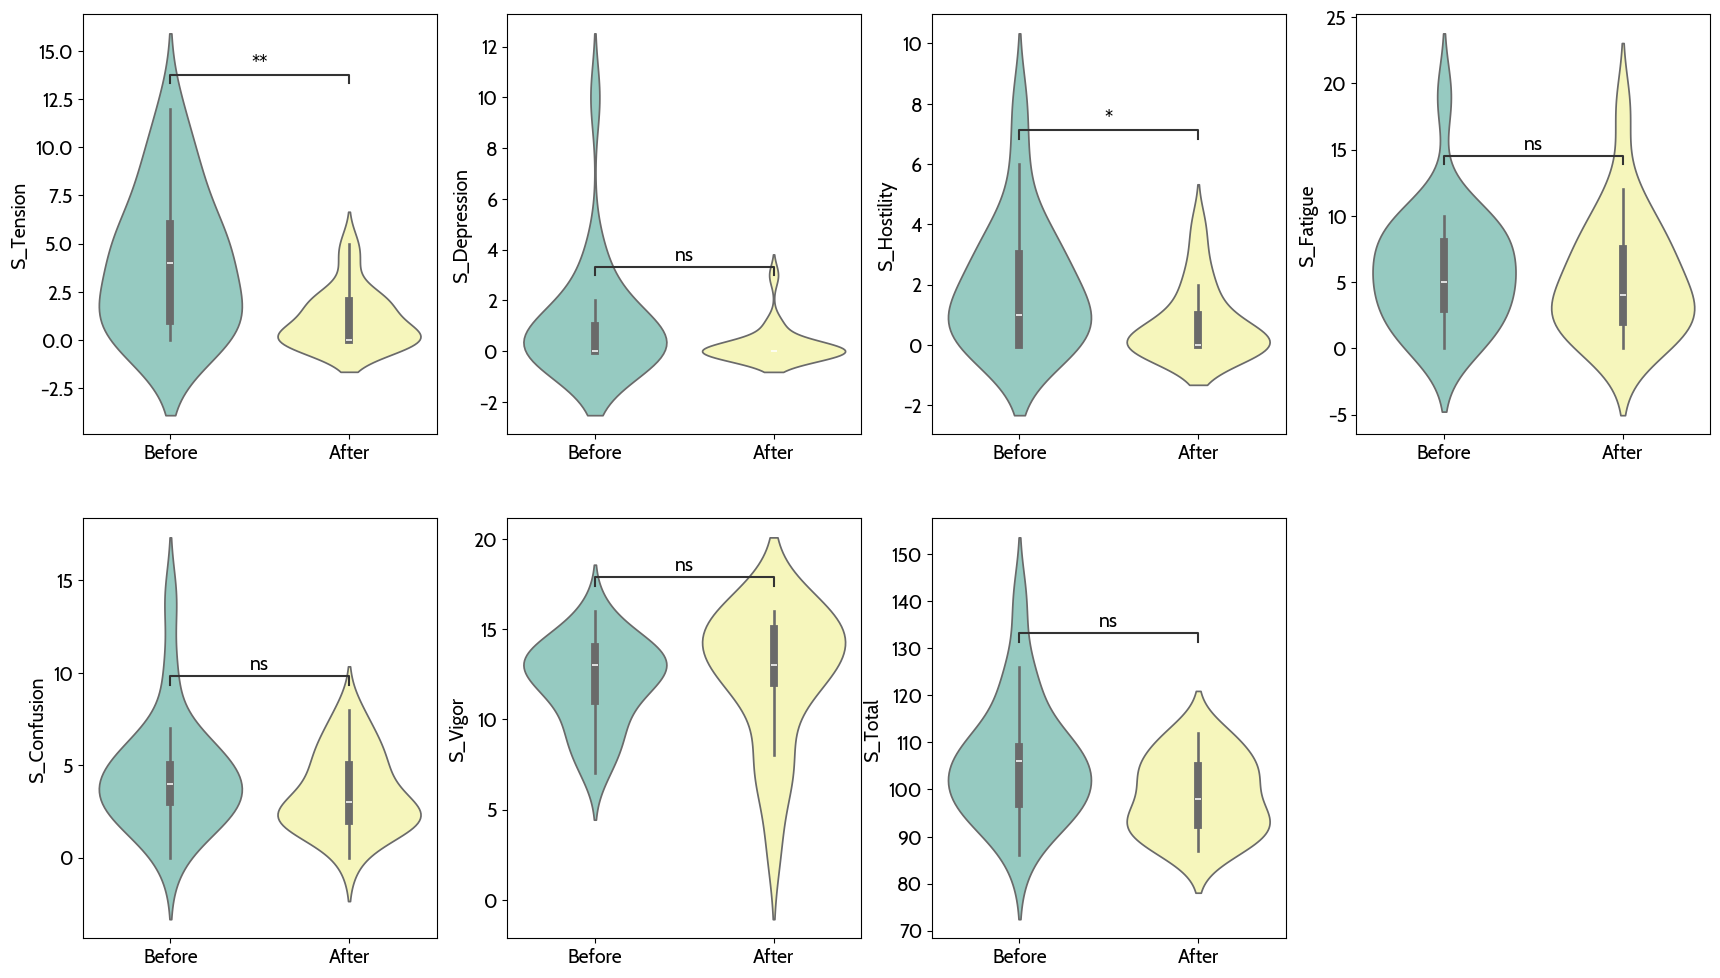

In [9]:
# let's do violin plots for the seven scores in a single figure
fig, ax = plt.subplots(2, 4, figsize=(21, 12))

for i, column_name in enumerate(new_column_name_list):
    sns.violinplot(x='Tempo', y=column_name, data=df, ax=ax[i//4, i%4], palette='Set3', hue='Tempo')

    # add statistical annotations
    annotator = Annotator(ax[i//4, i%4], [('Antes','Depois')], data=df, x='Tempo', y=column_name, order=['Antes','Depois'])
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()

    # edit labels
    ax[i//4, i%4].set_xlabel('')
    ax[i//4, i%4].set_xticks([0, 1])
    ax[i//4, i%4].set_xticklabels(['Before', 'After'])

# hide the last subplot
ax[1, 3].axis('off')

## Aim for paired test by removing subjects

In [10]:
# get df again
df_paired = pd.read_csv(tsv_path, sep='\t')

# subtract 1 from all values from the third column to the last
df_paired.iloc[:, 2:] = df_paired.iloc[:, 2:] - 1

# Invert the scores of Eficaz, Tranquilo, Competente
df_paired['Eficaz'] = 4 - df_paired['Eficaz']
df_paired['Tranquilo'] = 4 - df_paired['Tranquilo']
df_paired['Competente'] = 4 - df_paired['Competente']

# missing data
df_paired = df_paired.fillna(2)

# find subjects that only have one response (pre or post) and remove them
df_paired = df_paired.groupby('Sujeito').filter(lambda x: len(x) == 2)

# short by Sujeito and Tempo
df_paired = df_paired.sort_values(by=['Sujeito', 'Tempo'])

df_paired

,Sujeito,Tempo,Tenso,Irritado,Imprestável,Esgotado,Animado,Confuso,Triste,Activo,Mal-humorado,Enérgico,Sem valor,Inquieto,Fatigado,Aborrecido,Desencorajado,Nervoso,Só,Baralhado,Exausto,Ansioso,Deprimido,Sem energia,Miserável,Desnorteado,Furioso,Eficaz,Cheio de vida,Com mau feitio,Tranquilo,Desanimado,Impaciente,Cheio de boa disposição,Inútil,Estourado,Competente,Culpado,Enervado,Infeliz,Alegre,Inseguro,Cansado,Apático
0,1,Antes,2,1,0,1,3,0,0,1,0,3,0,1,2,1.0,0,1.0,0,0.0,1,1.0,0,1,0,0,0.0,2,2,0,2,0,0,3,1,1,2,0,1,0,3,0,2,0
1,1,Depois,0,0,0,2,3,0,0,3,0,3,0,1,2,1.0,0,0.0,0,1.0,2,0.0,0,2,0,0,0.0,1,2,0,1,1,1,3,0,1,1,0,1,0,3,0,3,0
2,2,Antes,0,0,0,0,2,0,0,2,0,2,0,0,1,2.0,0,0.0,0,0.0,0,1.0,0,0,0,0,0.0,2,1,0,0,0,0,2,0,0,2,0,0,0,3,0,0,0
3,2,Depois,0,0,0,1,3,0,0,3,0,2,0,0,0,0.0,0,0.0,0,0.0,2,0.0,0,2,0,0,0.0,1,3,0,0,0,0,3,0,0,1,0,0,0,3,0,2,0
4,3,Antes,0,0,1,1,3,0,0,3,1,2,0,1,2,0.0,0,1.0,0,1.0,1,1.0,0,1,0,0,0.0,1,2,1,1,1,2,2,1,2,1,0,0,0,3,2,2,0
5,3,Depois,0,0,0,0,3,0,0,3,0,3,0,0,2,0.0,0,0.0,0,1.0,1,0.0,0,1,0,1,0.0,1,2,1,0,0,0,3,0,2,2,0,0,0,3,1,2,0
6,4,Antes,0,0,0,0,3,0,0,4,0,3,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,1,3,0,0,0,0,3,0,0,1,0,0,0,3,0,0,0
8,4,Depois,0,0,0,1,3,0,0,3,0,3,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,1,3,0,0,0,0,3,0,0,1,0,0,0,3,0,0,0
7,5,Antes,1,0,0,0,2,0,1,2,0,2,0,0,2,1.0,0,0.0,0,0.0,1,1.0,0,1,0,0,0.0,2,2,0,2,1,0,1,0,0,1,0,0,0,1,0,2,1
9,5,Depois,0,0,0,0,2,0,0,1,0,1,0,0,1,1.0,0,0.0,0,0.0,1,0.0,0,1,0,0,0.0,1,1,0,2,0,1,2,0,0,1,0,0,0,1,0,1,1


In [11]:
# estimate Tensão, Depressão, Hostilidade, Vigor, Fadiga, Confusão, Total
df_paired['S_Tension'] = df_paired['Tenso'] + df_paired['Nervoso'] + df_paired['Impaciente'] + df_paired['Inquieto'] + df_paired['Ansioso']
df_paired['S_Depression'] = df_paired['Triste'] + df_paired['Desencorajado'] + df_paired['Só'] + df_paired['Deprimido'] + df_paired['Desanimado'] + df_paired['Infeliz']
df_paired['S_Hostility'] = df_paired['Irritado'] + df_paired['Mal-humorado'] + df_paired['Aborrecido'] + df_paired['Furioso'] + df_paired['Com mau feitio'] + df_paired['Enervado']
df_paired['S_Fatigue'] = df_paired['Esgotado'] + df_paired['Fatigado'] + df_paired['Exausto'] + df_paired['Sem energia'] + df_paired['Cansado'] + df_paired['Estourado']
df_paired['S_Vigor'] = df_paired['Animado'] + df_paired['Activo'] + df_paired['Enérgico'] + df_paired['Alegre'] + df_paired['Cheio de boa disposição']
df_paired['S_Confusion'] = df_paired['Confuso'] + df_paired['Baralhado'] + df_paired['Desnorteado'] + df_paired['Inseguro'] + df_paired['Competente'] + df_paired['Eficaz']

df_paired['S_Total'] = df_paired['S_Tension'] + df_paired['S_Depression'] + df_paired['S_Hostility'] + df_paired['S_Fatigue'] + df_paired['S_Confusion'] - df_paired['S_Vigor'] + 100

In [12]:
# descriptive statistics
df_paired.groupby('Tempo')[['S_Tension', 'S_Depression', 'S_Hostility', 'S_Fatigue', 'S_Confusion', 'S_Vigor', 'S_Total']].describe()

S_Tension                                              S_Depression  \
           count      mean       std  min  25%  50%  75%  max        count   
Tempo                                                                        
Antes       19.0  3.315789  2.868461  0.0  1.0  3.0  5.0  9.0         19.0   
Depois      19.0  1.105263  1.486784  0.0  0.0  0.0  2.0  5.0         19.0   

                                                    S_Hostility            \
            mean       std  min  25%  50%  75%  max       count      mean   
Tempo                                                                       
Antes   0.578947  0.901591  0.0  0.0  0.0  1.0  3.0        19.0  1.578947   
Depois  0.263158  0.733493  0.0  0.0  0.0  0.0  3.0        19.0  0.736842   

                                          S_Fatigue                           \
             std  min  25%  50%  75%  max     count      mean       std  min   
Tempo                                                                          
Antes   1.643701  0.0  0.0  1.0  2.5  6.0      19.0  5.578947  4.413562  0.0   
Depois  1.194529  0.0  0.0  0.0  1.0  4.0      19.0  5.421053  4.549918  0.0   

                            S_Confusion                                     \
        25%  50%  75%   max       count      mean       std  min  25%  50%   
Tempo                                                                        
Antes   2.5  5.0  8.0  19.0        19.0  3.736842  1.758854  0.0  2.5  4.0   
Depois  2.0  4.0  7.5  18.0        19.0  3.526316  2.117872  0.0  2.0  3.0   

                 S_Vigor                                                    \
        75%  max   count       mean       std  min   25%   50%   75%   max   
Tempo                                                                        
Antes   5.0  7.0    19.0  11.947368  2.437523  7.0  10.5  13.0  13.5  16.0   
Depois  5.0  8.0    19.0  12.473684  3.672245  3.0  12.0  13.0  15.0  16.0   

       S_Total                                                         
         count        mean       std   min   25%    50%    75%    max  
Tempo                                                                  
Antes     19.0  102.842105  8.706723  86.0  97.0  104.0  108.0  121.0  
Depois    19.0   98.578947  8.050644  87.0  92.5   98.0  105.0  112.0

In [13]:
# calculate the difference between the two time points using a Wilcoxon signed-rank test
from scipy.stats import wilcoxon

for column_name in new_column_name_list:
    print(column_name)
    print(wilcoxon(df_paired[df_paired['Tempo'] == 'Antes'][column_name], df_paired[df_paired['Tempo'] == 'Depois'][column_name]))

S_Tension
WilcoxonResult(statistic=np.float64(4.0), pvalue=np.float64(0.0019970074675615423))
S_Depression
WilcoxonResult(statistic=np.float64(16.5), pvalue=np.float64(0.2504843488988283))
S_Hostility
WilcoxonResult(statistic=np.float64(7.5), pvalue=np.float64(0.021357865441130323))
S_Fatigue
WilcoxonResult(statistic=np.float64(68.0), pvalue=np.float64(1.0))
S_Confusion
WilcoxonResult(statistic=np.float64(34.0), pvalue=np.float64(0.6885656058439972))
S_Vigor
WilcoxonResult(statistic=np.float64(38.0), pvalue=np.float64(0.20515277829370127))
S_Total
WilcoxonResult(statistic=np.float64(28.0), pvalue=np.float64(0.012038941522256891))


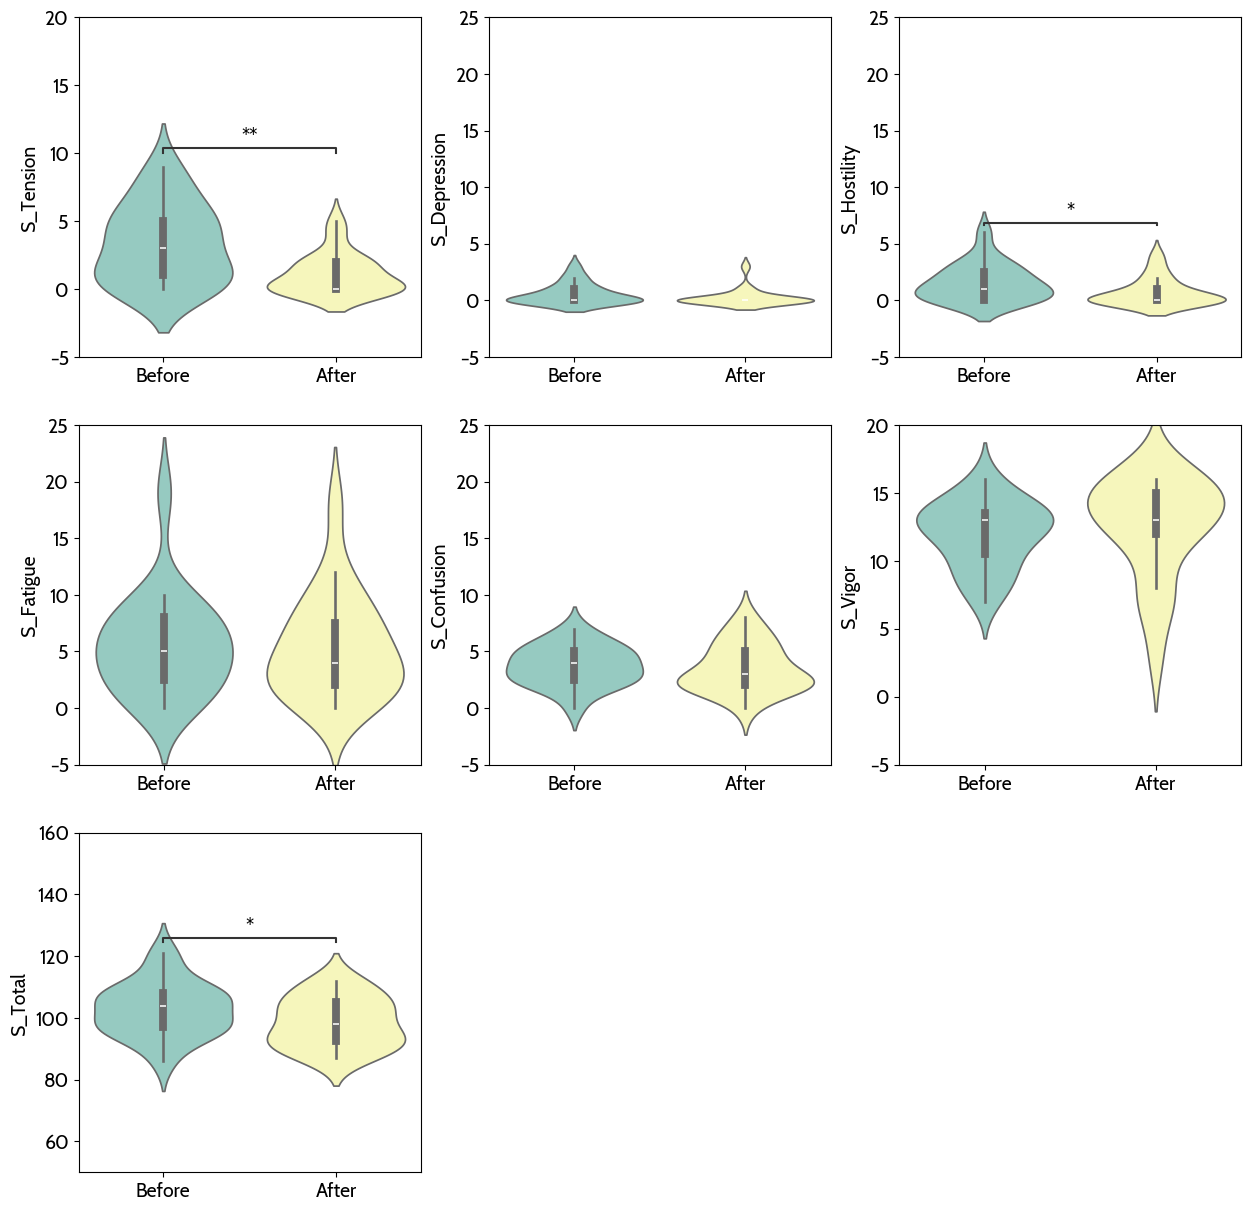

In [20]:
#| label: fig:behav-poms
# let's do violin plots for the seven scores in a single figure
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i, column_name in enumerate(new_column_name_list):
    sns.violinplot(x='Tempo', y=column_name, data=df_paired, ax=ax[i//3, i%3], palette='Set3', hue='Tempo')

    # add statistical annotations
    annotator = Annotator(ax[i//3, i%3], [('Antes','Depois')], data=df_paired, x='Tempo', y=column_name, order=['Antes','Depois'])
    annotator.configure(test='Wilcoxon', text_format='star', loc='inside', hide_non_significant=True, verbose=0)
    annotator.apply_and_annotate()

    # edit labels
    ax[i//3, i%3].set_xlabel('')
    ax[i//3, i%3].set_xticks([0, 1])
    ax[i//3, i%3].set_xticklabels(['Before', 'After'])

    # edit lim
    if column_name == 'S_Total':
        ax[i//3, i%3].set_ylim([50, 160])
    elif column_name == 'S_Tension' or column_name == 'S_Vigor':    
        ax[i//3, i%3].set_ylim([-5, 20])
    else:
        ax[i//3, i%3].set_ylim([-5, 25])

# hide the last subplot
ax[2, 2].axis('off')
ax[2, 1].axis('off')
plt.show()
